In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
# Function to import saved stacking results
def import_saved_pickles(pickle_fn):
    with open(pickle_fn, "rb") as file_path:
        encoding = pickle.load(file_path)
    return encoding

In [3]:
# Define path and filename of imported results (i.e., pickle)
pickle_filename = 'cosmos2020_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_7_8_background_slices_farmer_bootstrap_100'
underscore_suffix = ''
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_filename)
pickle_path = 'D:\\pickles\\'+os.path.join("simstack","stacked_flux_densities",pickle_filename)
path_file = os.path.join(pickle_path+underscore_suffix, pickle_filename+".pkl")

In [4]:
# Import saved stacking results
simstack_object = import_saved_pickles(path_file)

In [5]:
# Import catalog with SimstackWrapper
path_ini_file = os.path.join(pickle_path, "cosmos2020.ini")
print(path_ini_file)
simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)

D:\pickles\simstack\stacked_flux_densities\cosmos2020_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_7_8_background_slices_farmer_bootstrap_100\cosmos2020.ini


In [6]:
# Pass saved results into SimstackResults
simstack_object = SimstackResults(simstack_object)

In [7]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [8]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

fucked!
fucked!
fucked!
fucked!
fucked!


In [9]:
sed_results_dict = simstack_object.results_dict['sed_bootstrap_results_dict']

In [10]:
sed_results_dict.keys()

dict_keys(['wavelengths', 'sed_fluxes_dict', 'std_fluxes_dict', 'sed_bootstrap_fluxes_dict', 'ngals'])

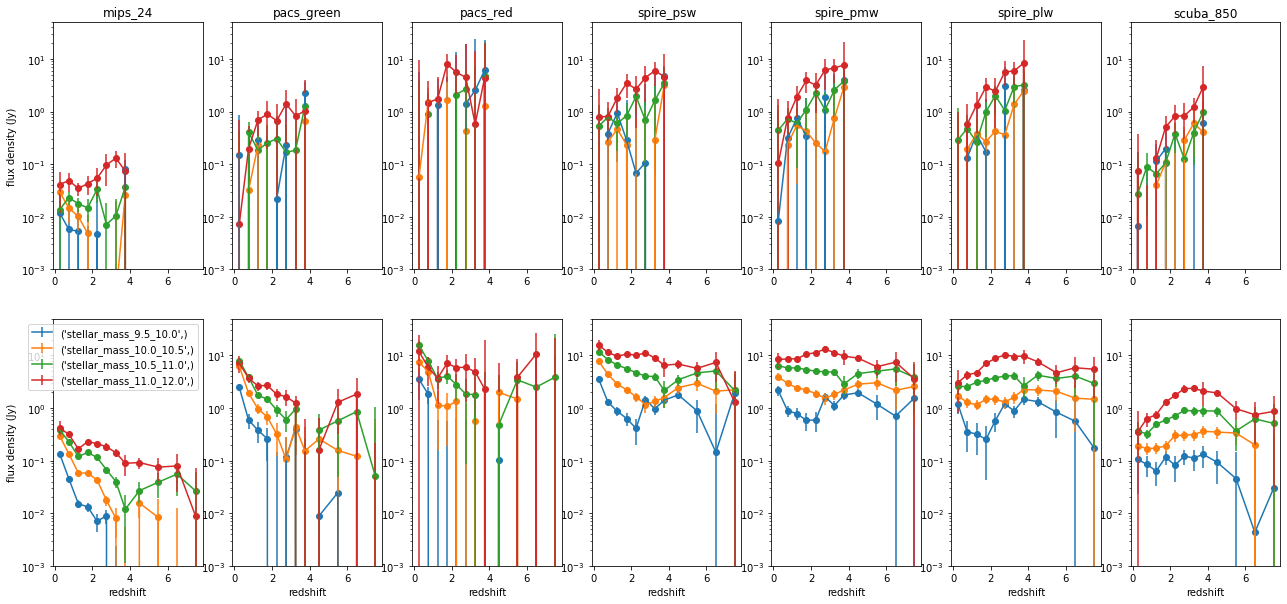

In [11]:
# Plot Flux Densities vs. Redshift in each band
simstack_object.plot_flux_densities()

fucked!


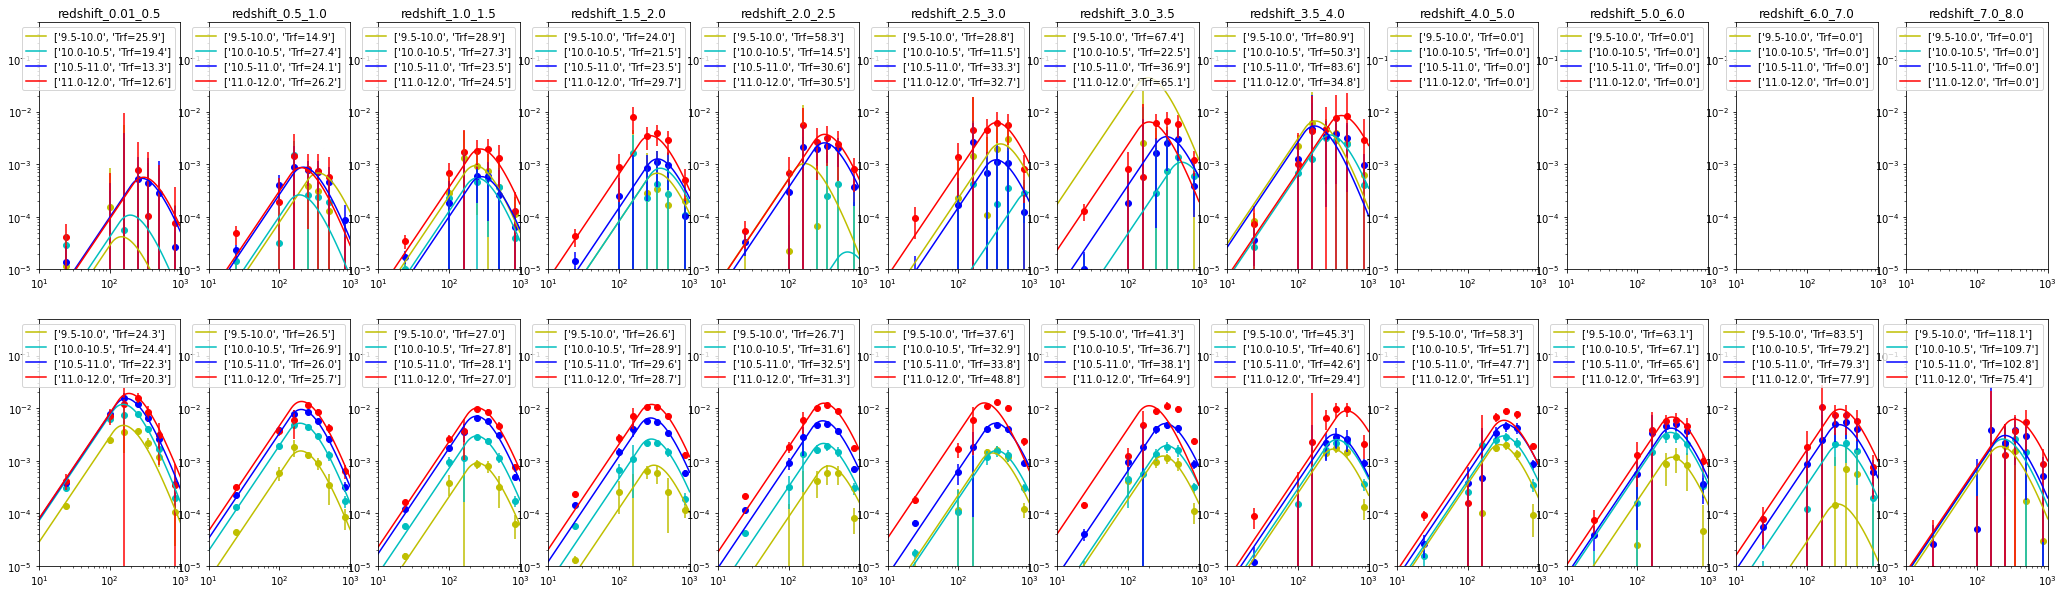

In [12]:
# Plot SEDs at each redshift
simstack_object.plot_seds(sed_results_dict)

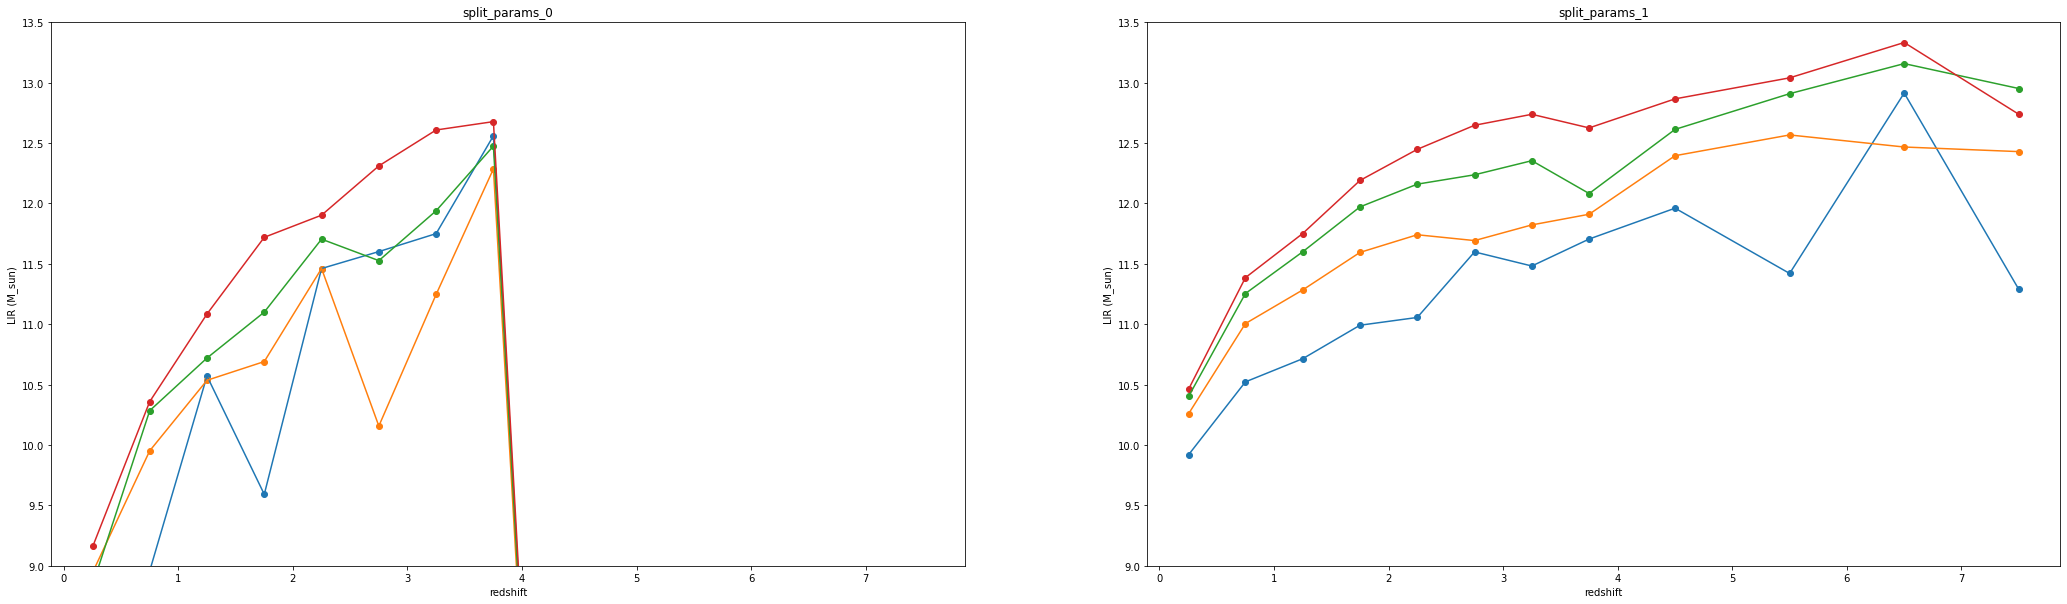

In [13]:
# Plot IR Luminosity vs Redshift for Quiescent (left) and Star-Forming (right) galaxies
simstack_object.plot_lir_vs_z()

In [14]:
flat_samples_dict = simstack_object.loop_mcmc_sed_estimator(sed_results_dict, simstack_catalog_object.catalog_dict['tables'], mcmc_iterations=150, mcmc_discard=3)

100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 255.35it/s]


fucked!


100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 263.38it/s]


fucked!


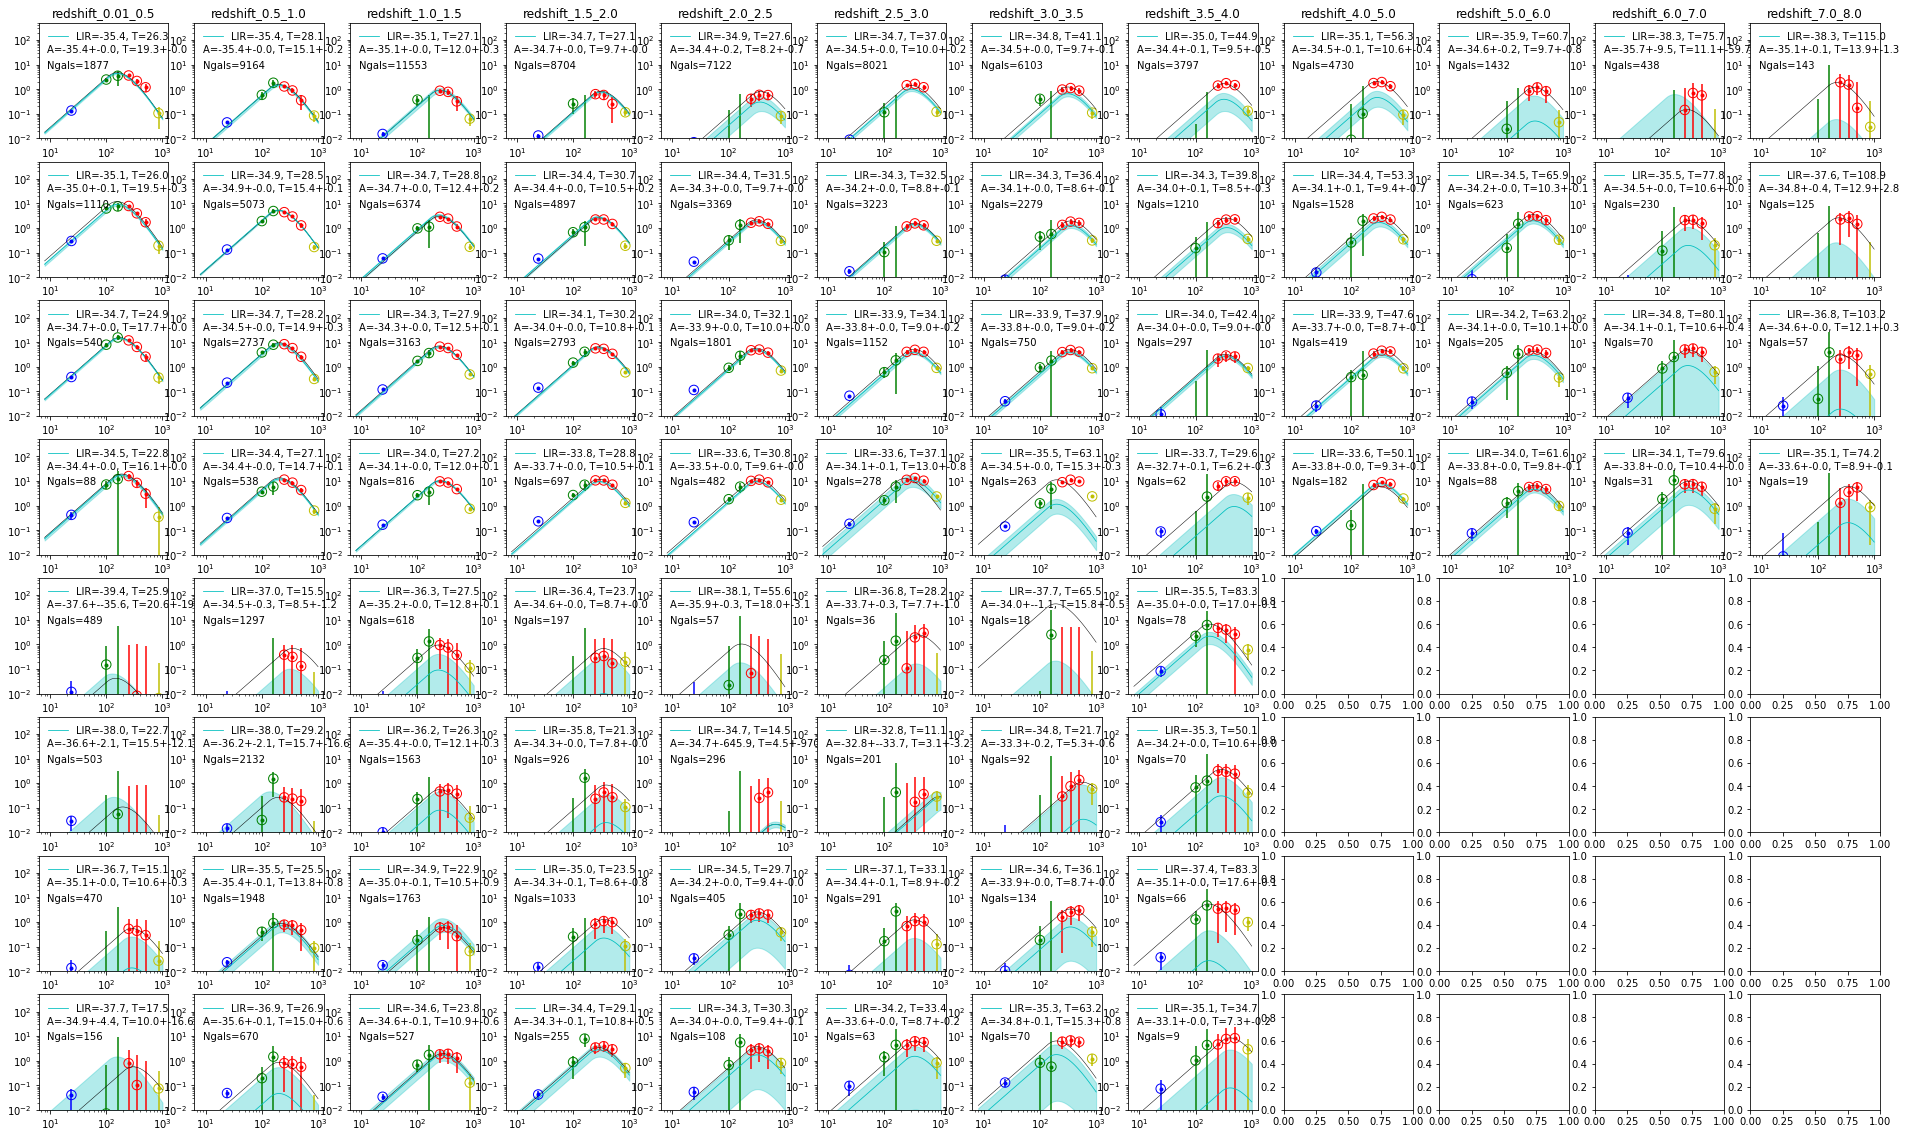

In [15]:
#simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=sed_results_dict, errors=('25', '75'))
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'))

In [16]:
lir_dict = simstack_object.get_lir_from_mcmc_samples(flat_samples_dict)

In [17]:
cosmos_area_deg2 = 1.6055  # deg2
lird_dict = simstack_object.estimate_luminosity_density(lir_dict, cosmos_area_deg2)

z=7.80, m=9.79 , 0.78
z=7.35, m=9.73 , 0.73


In [18]:
# Estimate IR Luminosity Density and SFR Density vs Redshift
total_lird_dict = simstack_object.estimate_total_lird_array(lird_dict, errors=('25', '75'))

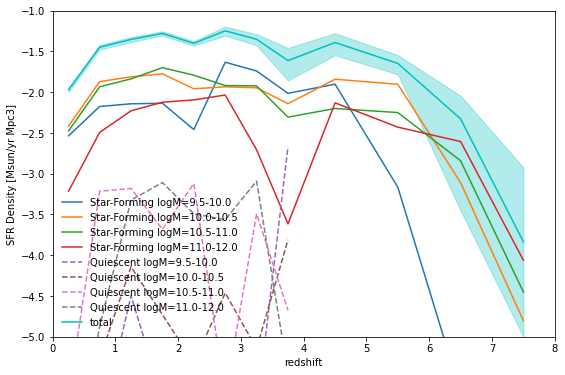

In [19]:
# Plot IR Luminosity Density and SFR Density vs Redshift
simstack_object.plot_total_lird(total_lird_dict, plot_lird=False, plot_sfrd=True)

In [20]:
# PLOT CIB
cib_dict = simstack_object.estimate_cib(sed_results_dict, cosmos_area_deg2)

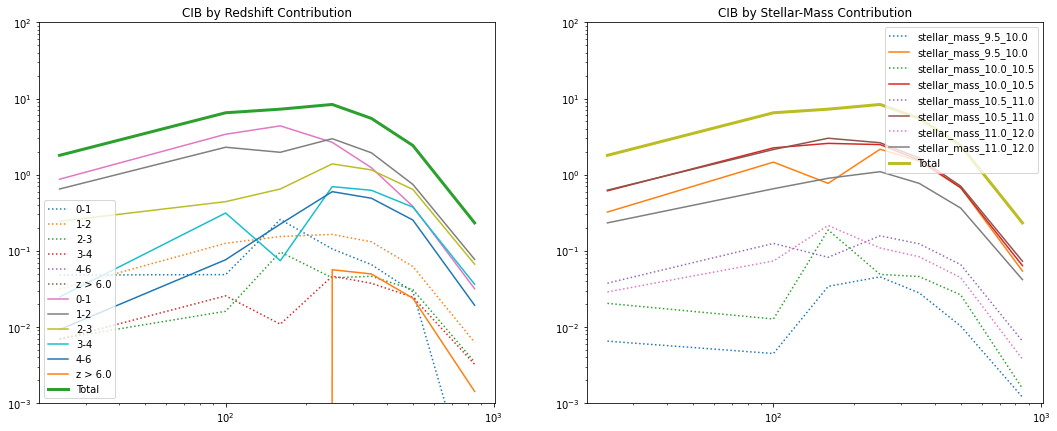

In [21]:
simstack_object.plot_cib(cib_dict)

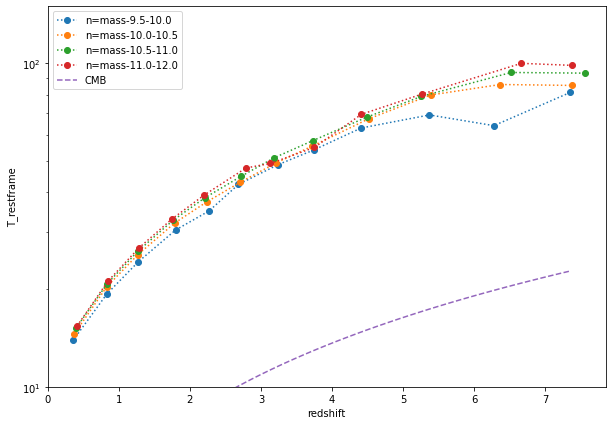

In [22]:
simstack_object.plot_rest_frame_temperature(lir_dict, ylim=[1e1, 1.5e2], fit_p=[1.3, 0.1])

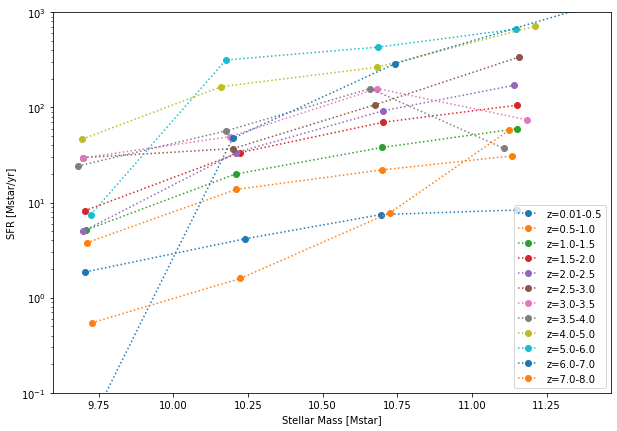

In [23]:
simstack_object.plot_star_forming_main_sequence(lir_dict, ylim=[1e-1, 1e3])